In [29]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
df_books = pd.read_csv("Books.csv").drop_duplicates()
df_ratings = pd.read_csv("Ratings.csv").drop_duplicates()
df_users = pd.read_csv("Users.csv").drop_duplicates().dropna(subset=['Age'])

C:\Users\ellen\AppData\Local\Temp\ipykernel_4596\2201335028.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv("Books.csv").drop_duplicates()


In [31]:
df_users

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [32]:
books_by_author = (
    df_books[["Book-Author", "ISBN"]]
    .groupby("Book-Author", as_index=False)
    .count()
    .sort_values(by="ISBN", ascending=False)
    .head(20)
)


books_by_author = books_by_author[books_by_author["Book-Author"]!= "Not Applicable (Na )"]

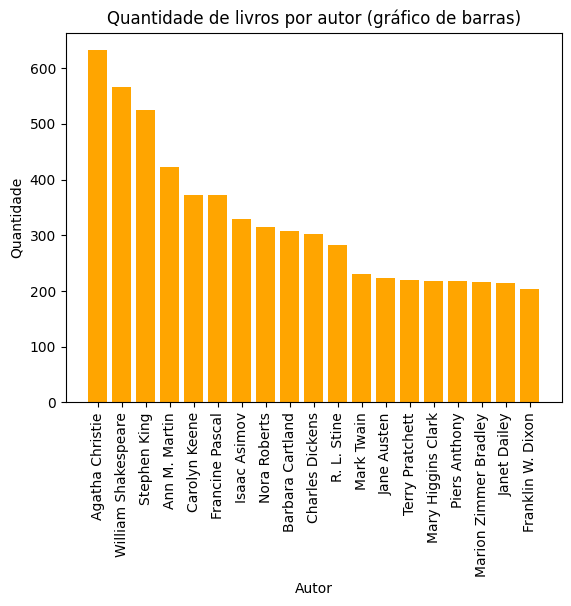

In [42]:
x_axis = books_by_author["Book-Author"]
y_axis = books_by_author["ISBN"]
plt.title("Quantidade de livros por autor (gráfico de barras)", loc="center")
plt.ylabel("Quantidade")
plt.xlabel("Autor")
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color="orange")
plt.show()

In [34]:
books_by_publisher = (
    df_books[["Publisher", "ISBN"]]
    .groupby("Publisher", as_index=False)
    .count()
    .sort_values(by="ISBN", ascending=False)
    .head(20)
)

books_by_publisher

,Publisher,ISBN
6583,Harlequin,7535
13667,Silhouette,4220
11762,Pocket,3905
1391,Ballantine Books,3783
1421,Bantam Books,3646
13259,Scholastic,3160
13712,Simon &amp; Schuster,2971
11390,Penguin Books,2844
1717,Berkley Publishing Group,2771
15931,Warner Books,2727


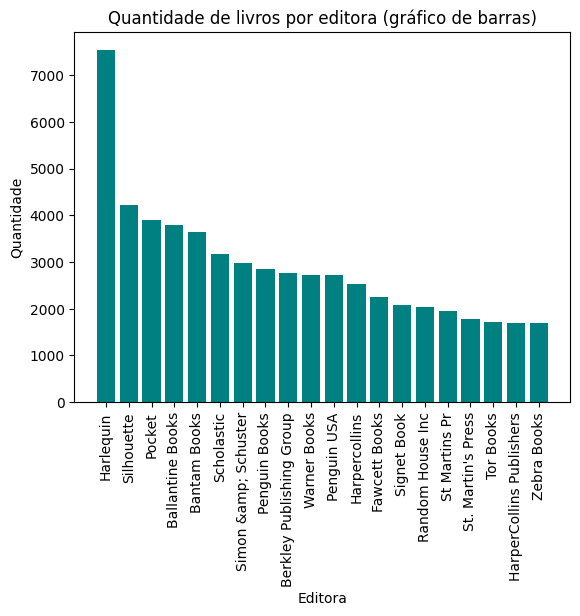

In [50]:
x_axis = books_by_publisher["Publisher"]
y_axis = books_by_publisher["ISBN"]
plt.title("Quantidade de livros por editora (gráfico de barras)", loc="center")
plt.ylabel("Quantidade")
plt.xlabel("Editora")
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color="teal")
plt.show()

In [36]:
df_ratings_join = df_ratings.merge(df_books, on="ISBN", how="inner")
df_ratings_join

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [37]:
df_counted = df_ratings_join[["Publisher", "Book-Rating"]].groupby(
    "Publisher", as_index=False
).count().sort_values(by="Book-Rating", ascending=False)

df_counted_filtered = df_counted[df_counted["Book-Rating"]>=100]

df_counted_filtered


,Publisher,Book-Rating
1388,Ballantine Books,34724
11710,Pocket,31989
1714,Berkley Publishing Group,28614
15861,Warner Books,25506
6557,Harlequin,25027
...,...,...
6681,Harrison House,101
1150,Audio Renaissance,100
9141,Macmillan General Reference,100
11488,Peter Pauper Press,100


In [38]:
df_ratings_mean = (
    df_ratings_join[["Publisher", "Book-Rating"]]
    .groupby("Publisher", as_index=False)
    .mean("Book-Rating")
    .sort_values(by="Book-Rating", ascending=False)
    .merge(df_counted_filtered["Publisher"], on="Publisher", how="inner")
    .head(20)
)

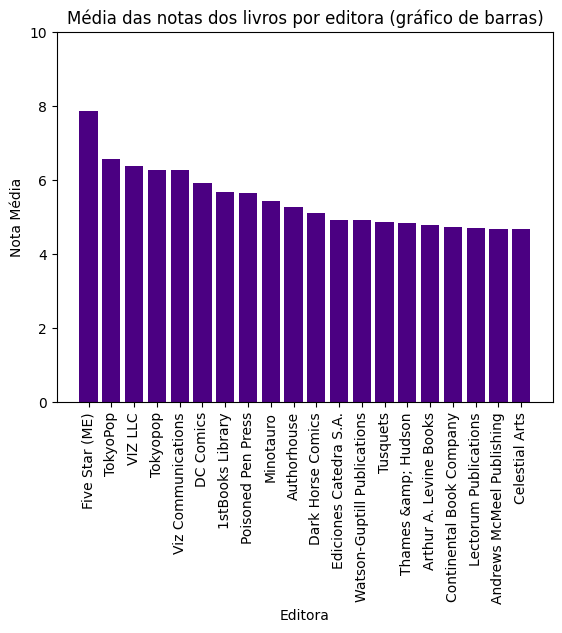

In [58]:
x_axis = df_ratings_mean["Publisher"]
y_axis = df_ratings_mean["Book-Rating"]
plt.title("Média das notas dos livros por editora (gráfico de barras)", loc="center")
plt.ylabel("Nota Média")
plt.xlabel("Editora")
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 10])
plt.bar(x_axis, y_axis, color="indigo")
plt.show()

In [63]:
df_counted = df_ratings_join[["Book-Title", "Book-Rating"]].groupby(
    "Book-Title", as_index=False
).count().sort_values(by="Book-Rating", ascending=False)

df_counted_filtered = df_counted[df_counted["Book-Rating"]>=100]

df_ratings_mean_books = (
    df_ratings_join[["Book-Title", "Book-Rating"]]
    .groupby("Book-Title", as_index=False)
    .mean("Book-Rating")
    .sort_values(by="Book-Rating", ascending=False)
    .merge(df_counted_filtered["Book-Title"], on="Book-Title", how="inner")
    .head(20)
)
df_ratings_mean_books

,Book-Title,Book-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804
1,Harry Potter and the Goblet of Fire (Book 4),5.824289
2,The Little Prince,5.815603
3,Harry Potter and the Sorcerer's Stone (Book 1),5.737410
4,Harry Potter and the Order of the Phoenix (Boo...,5.501441
5,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639
6,Harry Potter and the Chamber of Secrets (Book 2),5.183453
7,The Perks of Being a Wallflower,5.144231
8,The Hobbit : The Enchanting Prelude to The Lor...,5.007117
9,The Fellowship of the Ring (The Lord of the Ri...,4.948370


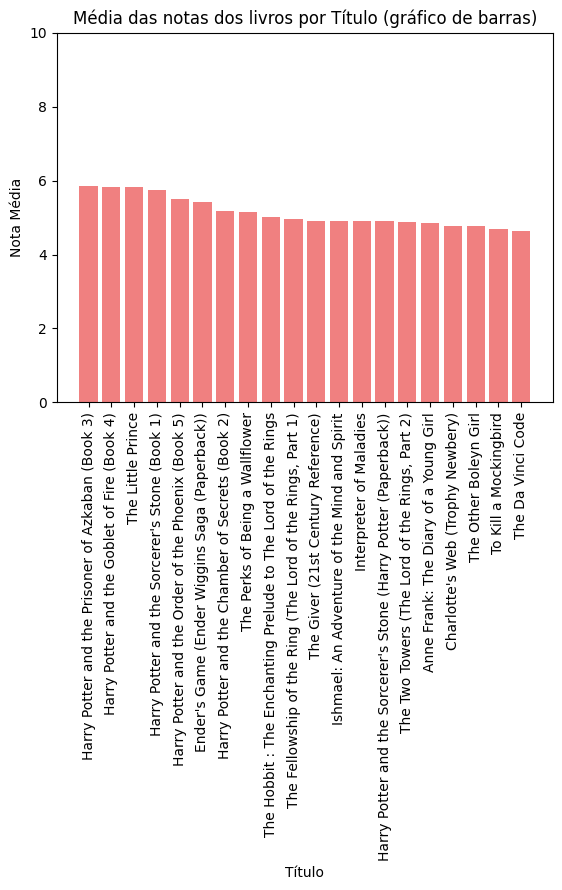

In [67]:
x_axis = df_ratings_mean_books["Book-Title"]
y_axis = df_ratings_mean_books["Book-Rating"]
plt.title("Média das notas dos livros por Título (gráfico de barras)", loc="center")
plt.ylabel("Nota Média")
plt.xlabel("Título")
plt.xticks(rotation=90)
ax = plt.gca()
ax.set_ylim([0, 10])
plt.bar(x_axis, y_axis, color="lightcoral")
plt.show()